In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(train_images)

60000

In [ ]:
len(test_images)

10000

In [ ]:
train_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
        254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
        254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
        206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
        137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
        254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
        254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
        254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
         89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
          0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
         89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
        254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
        254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
        254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

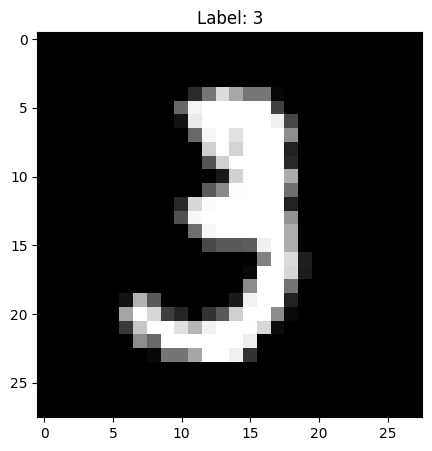

In [ ]:
def visualize_image(image, label):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    # plt.axis('off')
    plt.show()

visualize_image(train_images[10], train_labels[10])

In [ ]:
image = train_images[10]
image[7]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
       254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [ ]:

image = train_images[10]
for row in image:
  for pixel in row:
    print(f'{pixel:3d}', end=' ')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   0   0   0   0   0 

In [ ]:
image = train_images[10]
for row in image:
  for pixel in row:
    print(f'{pixel:3d}', end=' ')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   0   0   0   0   0 

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
image = train_images[0]
for row in image:
    for pixel in row:
        print(f'{pixel:.2f}', end=' ')
    print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.10 0.65 1.00 0.97 0.50 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.14 0.37 0.60 0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.00 0.00 0.00 0.00 
0.00 0.00 0.0

In [ ]:

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
  Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3777 - accuracy: 0.8888
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1607 - accuracy: 0.9514
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1135 - accuracy: 0.9656
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0856 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9790


In [31]:
# Step 1: Make predictions on the test data
predictions = model.predict(test_images)

# Step 2: Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Ensure that test_labels is in the correct shape
if len(test_labels.shape) > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Step 4: Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)

# Step 5: Print the accuracy
print("Accuracy:", accuracy)


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9693
